#           TRABAJO FINAL - OPTIMIZACIÓN DE PORTAFOLIOS BASADO EN ANÁLISIS FUNDAMENTAL Y BACKTESTING 




El presente trabajo se centra en el análisis y optimización de portafolios de inversión, con el objetivo de maximizar los rendimientos y minimizar los riesgos. Para ello, se emplean distintas técnicas de optimización que asignan ponderaciones específicas a los activos de una cartera, buscando alcanzar un equilibrio eficiente entre retorno y volatilidad.


Antes de aplicar estas técnicas, resulta fundamental seleccionar cuidadosamente los activos que compondrán la cartera, ya que esta etapa puede marcar una diferencia significativa en el desempeño del portafolio. En este caso, se utiliza el método F-Score, una herramienta que analiza indicadores fundamentales de las empresas para identificar aquellas acciones con mayor potencial de rendimiento.


Finalmente, se realiza un proceso de backtesting, evaluando el comportamiento del portafolio seleccionado durante un período de 5 años. Los resultados obtenidos se comparan con el rendimiento del índice Nasdaq, permitiendo 
medir la eficacia de la estrategia y su capacidad para superar al mercado.


## SELECCION DE ACTIVOS


## Método F-Score
El método F-Score es una herramienta que se utiliza para analizar los estados financieros de las empresas con el fin de identificar oportunidades de inversión. Su propósito es evaluar la salud financiera de las compañías, clasificándolas según su potencial. Las empresas con mejores puntajes suelen ser aquellas subvaluadas en el momento actual (t=0) y con posibilidad de revalorizarse en el futuro (t+1).

Por el contrario, las empresas con puntuaciones bajas son generalmente consideradas sobrevaluadas o financieramente débiles, lo que podría anticipar una caída en su valor. Este enfoque permite seleccionar activos basados en fundamentos sólidos, ayudando a construir un portafolio con mayor probabilidad de éxito y menor exposición a riesgos innecesarios.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np


### Evaluación de Empresas y Selección Inicial

El primer paso consiste en definir el universo de acciones sobre el cual se llevará a cabo el análisis y la selección. Para este trabajo, hemos decidido enfocar la búsqueda en los tickers que componen el índice estadounidense Nasdaq, dado su enfoque en empresas tecnológicas y de alto crecimiento. Posteriormente, aplicamos un filtro de selección utilizando el método F-Score, una herramienta que evalúa los indicadores fundamentales de cada empresa para identificar aquellas con mayor potencial de rendimiento y descartar las menos atractivas. Este proceso nos permite reducir el universo inicial a un conjunto más manejable y con mejores perspectivas para construir un portafolio óptimo.

In [2]:
# Página donde extraeremos los Tickers de Nasdaq
url = 'https://en.wikipedia.org/wiki/Nasdaq-100#Components'

# Leemos todas las tablas de la página
tables = pd.read_html(url)

# Importamos la tabla que contiene los tickers del Nasdaq 100
nasdaq_100_tickers = tables[4]

# Extraemos solo las columnas 'Symbol' y 'Company'
symbols = nasdaq_100_tickers['Symbol']
names = nasdaq_100_tickers['Company']

# Creamos un DataFrame con los símbolos y nombres
nasdaq_df = pd.DataFrame({'Symbol': symbols, 'Company': names})
pd.set_option('display.max_colwidth', None)


# Guardamos el DataFrame en un archivo CSV
nasdaq_df.to_csv('nasdaq_100_tickers.csv', index=False)
print("Archivo 'nasdaq_100_tickers.csv' creado exitosamente.")
display(nasdaq_100_tickers)

# Agrego este comando para que me de una lista, que luego voy a utilizar para incorporarle los datos financieros a los tickers
ticker_list = symbols.to_list()


Archivo 'nasdaq_100_tickers.csv' creado exitosamente.


,Company,Symbol,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,Advanced Micro Devices,AMD,Information Technology,Semiconductors
2,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
3,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
4,Alphabet Inc. (Class C),GOOG,Communication Services,Interactive Media & Services
...,...,...,...,...
96,Vertex Pharmaceuticals,VRTX,Health Care,Biotechnology
97,Warner Bros. Discovery,WBD,Communication Services,Broadcasting
98,"Workday, Inc.",WDAY,Information Technology,Application Software
99,Xcel Energy,XEL,Utilities,Multi-Utilities



## Extracción de Datos Financieros y Cálculo del F-Score

Una vez obtenidos los tickers de las empresas que conforman el índice Nasdaq, el siguiente paso es extraer los datos financieros correspondientes a cada empresa. Para ello, utilizamos la librería yfinance, que nos permite acceder a la información financiera de las empresas listadas en el mercado. Estos datos servirán para calcular el F-Score, un indicador que evalúa la salud financiera de las compañías en función de nueve criterios fundamentales

### **Cálculo del F-Score**

La función que implementamos para calcular el F-Score realiza lo siguiente:

Obtención de Datos Financieros:
Utilizando la lista de tickers obtenida previamente, la función descarga los datos financieros de cada empresa a través de la librería yfinance. Esto incluye información sobre el balance general, el estado de resultados y otros indicadores clave.

Cálculo de los 9 Criterios Fundamentales:
El F-Score se basa en nueve criterios que se agrupan en tres categorías clave para evaluar la situación financiera de una empresa:

Rentabilidad: Se analizan indicadores como el retorno sobre el capital (ROE) y el retorno sobre activos (ROA).
Liquidez: Se revisan ratios como el ratio de liquidez corriente y el ratio rápido, para evaluar la capacidad de la empresa para cubrir sus deudas a corto plazo.
Eficiencia Operativa: Se consideran métricas como la rotación de activos y el margen operativo, para medir qué tan eficientemente la empresa está utilizando sus recursos.
Asignación de Puntuación:
Cada uno de estos 9 criterios se puntúa con un valor binario (1 o 0), dependiendo de si la empresa cumple o no con los umbrales establecidos para cada criterio. Al final, el F-Score es la suma de estas puntuaciones, lo que da una evaluación general de la salud financiera de la empresa.

Aplicación del F-Score:
Una vez calculado el F-Score para cada empresa, estos datos se pueden utilizar para filtrar las empresas con mejor puntuación, lo que nos ayuda a seleccionar aquellas con mayores perspectivas de rendimiento a futuro. Este proceso es clave para la construcción de un portafolio optimizado, basado en empresas con buenos fundamentos financieros.





## Rentabilidad
1. **Net Income + El ingreso neto positivo**, indica la capacidad de una empresa para generar beneficios, calculado restando los gastos totales de los ingresos totales anuales. Esto excluye a las empresas con pérdidas.
2. **Aumento en el ROA**, indica cuánto beneficio genera una empresa en relación con sus activos totales. Se calcula dividiendo el beneficio neto entre los activos totales.
3. **Cash Flow operativo neto positivo**, indica la capacidad de la empresa para generar flujo de efectivo operativo. Esto es crucial para evitar empresas que dependan excesivamente de reservas de efectivo o financiamiento con deuda.
4. **Cash Flow operativo que excede al ingreso neto**, esto puede ayudar a identificar y eliminar empresas que podrían estar involucradas en la manipulación de sus beneficios.

## Liquidez
1. **Menor proporción de Deuda a Largo Plazo en el año actual en comparación con el período anterior**. Esto ayuda a filtrar empresas con escasez de efectivo.
2. **Ratio de Liquidez (Current Ratio) mayor este año en comparación con el anterior**. Es la capacidad de la empresa para pagar sus obligaciones a corto plazo, calculado dividiendo los activos corrientes entre los pasivos corrientes. Esto muestra la eficiencia del capital de trabajo.
3. **No emisión de acciones (acciones en circulación)**. Es la capacidad de la empresa para crecer sin diluir el capital propio, es decir, sin buscar capital adicional.

## Eficiencia Operativa
1. **Un Margen Bruto más alto en comparación con el año anterior**. El beneficio bruto entre las ventas totales. Esto puede mostrar la presión de precios de los competidores.
2. **Una mayor Rotación de Activos (Asset Turnover Ratio) en comparación con el año anterior**. Una eficiencia de activos en declive no es favorable.







In [3]:
# First, read the Nasdaq tickers list
ticker_list = pd.read_csv('nasdaq_100_tickers.csv')['Symbol'].tolist()

def calculate_fscore(ticker):
    """Calculate F-Score for a given ticker"""
    try:
        stock = yf.Ticker(ticker)
        
        # Get financial statements
        income_statement = stock.financials
        balance_sheet = stock.balance_sheet
        cash_flow = stock.cashflow

        # Current and historical metrics
        metrics = {
            'Net Income': income_statement.loc['Net Income'],
            'Total Assets': balance_sheet.loc['Total Assets'],
            'Operating Cash Flow': cash_flow.loc['Operating Cash Flow'],
            'Total Debt': balance_sheet.loc['Total Debt'],
            'Current Assets': balance_sheet.loc['Current Assets'],
            'Current Liabilities': balance_sheet.loc['Current Liabilities'],
            'Shares Outstanding': balance_sheet.loc['Ordinary Shares Number'],
            'Gross Profit': income_statement.loc['Gross Profit'],
            'Total Revenue': income_statement.loc['Total Revenue']
        }

        # Calculate derived metrics
        current_ratio = metrics['Current Assets'][0] / metrics['Current Liabilities'][0]
        current_roa = metrics['Net Income'][0] / metrics['Total Assets'][0]
        last_year_roa = metrics['Net Income'][1] / metrics['Total Assets'][1]
        asset_turnover = metrics['Total Revenue'][0] / metrics['Total Assets'][1]

        # Calculate F-Score
        f_score = sum([
            metrics['Net Income'][0] >= metrics['Net Income'][1],  # 1. Net Income
            current_roa >= last_year_roa,  # 2. ROA
            metrics['Operating Cash Flow'][0] >= metrics['Operating Cash Flow'][1],  # 3. Operating Cash Flow
            metrics['Operating Cash Flow'][0] > metrics['Net Income'][0],  # 4. Cash Flow vs Net Income
            metrics['Total Debt'][0] < metrics['Total Debt'][1],  # 5. Long Term Debt
            current_ratio > 1,  # 6. Current Ratio
            metrics['Shares Outstanding'][0] <= metrics['Shares Outstanding'][1],  # 7. Shares Outstanding
            metrics['Gross Profit'][0] >= metrics['Gross Profit'][1],  # 8. Gross Margin
            asset_turnover >= 1  # 9. Asset Turnover
        ])

        return {
            'Ticker': ticker,
            'F-Score': f_score,
            'Net Income': metrics['Net Income'][0],
            'Last Year Net Income': metrics['Net Income'][1],
            'ROA': current_roa,
            'Last Year ROA': last_year_roa,
            'Operating Cash Flow': metrics['Operating Cash Flow'][0],
            'Last Year Operating Cash Flow': metrics['Operating Cash Flow'][1],
            'Long Term Debt': metrics['Total Debt'][0],
            'Last Year Long Term Debt': metrics['Total Debt'][1],
            'Current Ratio': current_ratio,
            'Current Shares Outstanding': metrics['Shares Outstanding'][0],
            'Last Year Shares Outstanding': metrics['Shares Outstanding'][1],
            'Gross Profit': metrics['Gross Profit'][0],
            'Last Year Gross Profit': metrics['Gross Profit'][1],
            'Asset Turnover': asset_turnover
        }
    except Exception as e:
        print(f"Error processing {ticker}: {e}")
        return None

def validate_price_history(ticker):
    """Verify if ticker has complete price history"""
    try:
        stock = yf.Ticker(ticker)
        hist = stock.history(start='2019-01-01', end='2024-12-31')
        return len(hist) >= 252 * 5  # At least 5 years of data
    except Exception as e:
        print(f"Error validating price history for {ticker}: {e}")
        return False

# Calculate F-Score for all tickers
results = []
for ticker in ticker_list:
    if validate_price_history(ticker):
        result = calculate_fscore(ticker)
        if result:
            results.append(result)

# Create and sort DataFrame
f_score_df = pd.DataFrame(results)
f_score_df_sorted = f_score_df.sort_values(by='F-Score', ascending=False)

# Save results
f_score_df_sorted.to_csv('f_score_NQ100.csv', index=False)
print("F-Score data saved to 'f_score_NQ100.csv'")

# Get top 15 tickers for portfolio optimization
fscore_tickers = f_score_df_sorted['Ticker'].head(15).tolist()

C:\Users\Bruno\AppData\Local\Temp\ipykernel_12140\1432325823.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_ratio = metrics['Current Assets'][0] / metrics['Current Liabilities'][0]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_12140\1432325823.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_roa = metrics['Net Income'][0] / metrics['Total Assets'][0]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_12140\1432325823.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior)

Error processing BKNG: 'Gross Profit'


C:\Users\Bruno\AppData\Local\Temp\ipykernel_12140\1432325823.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_ratio = metrics['Current Assets'][0] / metrics['Current Liabilities'][0]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_12140\1432325823.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_roa = metrics['Net Income'][0] / metrics['Total Assets'][0]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_12140\1432325823.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior)

Error processing MNST: 'Total Debt'


C:\Users\Bruno\AppData\Local\Temp\ipykernel_12140\1432325823.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_ratio = metrics['Current Assets'][0] / metrics['Current Liabilities'][0]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_12140\1432325823.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_roa = metrics['Net Income'][0] / metrics['Total Assets'][0]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_12140\1432325823.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior)

F-Score data saved to 'f_score_NQ100.csv'


C:\Users\Bruno\AppData\Local\Temp\ipykernel_12140\1432325823.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_ratio = metrics['Current Assets'][0] / metrics['Current Liabilities'][0]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_12140\1432325823.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_roa = metrics['Net Income'][0] / metrics['Total Assets'][0]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_12140\1432325823.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior)

# Visualización del F-Score

Para facilitar el análisis y la selección de las empresas con mejor desempeño financiero, se crea un DataFrame que organiza y visualiza el F-Score de cada empresa. Este paso es esencial para identificar rápidamente las empresas más sólidas en términos financieros, lo que nos permitirá enfocarnos en aquellas con mayor potencial para formar un portafolio optimizado. A continuación, se detallan los pasos para llevar a cabo este proceso:

Creación del DataFrame:
A partir de los F-Scores calculados previamente para cada empresa, organizamos los datos en un DataFrame. Este DataFrame incluye el nombre de la empresa, su ticker y el F-Score correspondiente, lo que permite una comparación clara entre todas las empresas analizadas.

Selección de las Mejores 15 Empresas:
Para optimizar el proceso y centrarnos en las mejores oportunidades de inversión, seleccionamos las 15 empresas con los F-Scores más altos. Este grupo de empresas representa las que tienen el mejor desempeño financiero según los criterios de rentabilidad, liquidez y eficiencia operativa.

Visualización:
El DataFrame resultante se visualiza de forma clara y ordenada, lo que facilita la identificación de las empresas más prometedoras. Esta visualización será útil para tomar decisiones sobre cuáles empresas incluir en el portafolio, antes de iniciar el proceso de optimización.

In [4]:
# Visualizamos los 15 Stocks que han sacado mejor puntaje (>7)
display(f_score_df_sorted.head(15))

,Ticker,F-Score,Net Income,Last Year Net Income,ROA,Last Year ROA,Operating Cash Flow,Last Year Operating Cash Flow,Long Term Debt,Last Year Long Term Debt,Current Ratio,Current Shares Outstanding,Last Year Shares Outstanding,Gross Profit,Last Year Gross Profit,Asset Turnover
22,CTAS,9,1.571592e+09,1.348010e+09,0.171406,0.157729,2.079781e+09,1.597814e+09,2.668080e+09,2.668393e+09,1.741960,4.050080e+08,4.069286e+08,4.686416e+09,4.173368e+09,1.122890
3,GOOG,8,7.379500e+10,5.997200e+10,0.183391,0.164188,1.017460e+11,9.149500e+10,2.850400e+10,2.967900e+10,2.096585,1.246000e+10,1.284900e+10,1.740620e+11,1.566330e+11,0.841567
4,AMZN,8,3.042500e+10,-2.722000e+09,0.057639,-0.005883,8.494600e+10,4.675200e+10,1.356110e+11,1.401180e+11,1.045077,1.038300e+10,1.024200e+10,9.380500e+10,6.764000e+10,1.242308
2,GOOGL,8,7.379500e+10,5.997200e+10,0.183391,0.164188,1.017460e+11,9.149500e+10,2.850400e+10,2.967900e+10,2.096585,1.246000e+10,1.284900e+10,1.740620e+11,1.566330e+11,0.841567
19,CDNS,8,1.041144e+09,8.489520e+08,0.183640,0.165260,1.349176e+09,1.241894e+09,7.644140e+08,8.874150e+08,1.242226,2.717060e+08,2.726750e+08,3.654945e+09,3.190095e+09,0.796171
18,AVGO,8,1.408200e+10,1.149500e+10,0.193272,0.156930,1.808500e+10,1.673600e+10,3.922900e+10,3.951500e+10,2.815260,4.140000e+09,4.180000e+09,2.469000e+10,2.209500e+10,0.489003
13,TEAM,8,-3.005190e+08,-4.867610e+08,-0.057658,-0.118526,1.448159e+09,8.681110e+08,1.249338e+09,1.282358e+09,1.178588,2.605565e+08,2.575668e+08,3.555108e+09,2.900882e+09,1.061319
16,BKR,8,1.943000e+09,-6.010000e+08,0.052592,-0.017583,3.062000e+09,1.888000e+09,6.021000e+09,6.658000e+09,1.254792,9.980000e+08,1.006000e+09,5.251000e+09,4.400000e+09,0.746204
51,LULU,8,1.550190e+09,8.548000e+08,0.218585,0.152451,2.296164e+09,9.664630e+08,1.403282e+09,1.070334e+09,2.489226,1.262220e+08,1.273210e+08,5.609405e+09,4.492340e+09,1.715572
54,MELI,8,9.870000e+08,4.820000e+08,0.055933,0.035090,5.140000e+09,2.940000e+09,5.333000e+09,5.414000e+09,1.265292,5.069744e+07,5.025775e+07,7.206000e+09,5.163000e+09,1.053655


- Ya tenemos los 15 Tickers de las empresas. Vamos a transformarlas en lista, para comenzar a extraer datos historicos de mercado.

In [5]:
fscore_tickers = f_score_df_sorted.iloc[:15, 0]

fscore_tickers.to_list()

print(fscore_tickers.to_list())


['CTAS', 'GOOG', 'AMZN', 'GOOGL', 'CDNS', 'AVGO', 'TEAM', 'BKR', 'LULU', 'MELI', 'FAST', 'IDXX', 'NVDA', 'QCOM', 'PDD']


# Descarga de Datos de Mercado

Una vez seleccionadas las empresas basadas en sus fundamentos financieros, el siguiente paso es obtener los datos de mercado necesarios para construir el portafolio. A diferencia de los estados financieros, que se enfocan en la salud interna de la empresa, los datos de mercado proporcionan información relevante sobre el comportamiento del precio de las acciones, volúmenes de transacciones y otros indicadores clave relacionados con el rendimiento en los mercados financieros. Estos datos son cruciales para calcular rendimientos históricos, volatilidad y correlaciones entre los activos, lo que es esencial para la optimización del portafolio.

Pasos para la descarga de datos:
Selección del Período de Análisis: Los datos de mercado serán extraídos para un plazo de **5 años**, lo que proporciona una base suficiente para analizar tendencias y calcular los rendimientos históricos de cada activo. Este período de tiempo es adecuado para evaluar el comportamiento de las acciones a lo largo de diferentes ciclos económicos.

Obtención de los Datos: Usaremos la librería yfinance para descargar los precios históricos de las acciones de las empresas seleccionadas. Estos datos incluirán precios de apertura, cierre, máximos, mínimos y volúmenes de transacciones para cada día dentro del período seleccionado.

Preparación de los Datos: Los datos descargados se organizan en un DataFrame, donde cada fila corresponde a un día de negociación y las columnas incluyen las variables relevantes para cada ticker. A partir de estos datos, se calcularán los rendimientos diarios, que son fundamentales para la optimización del portafolio.

Cálculo de Rendimientos y Volatilidad: A partir de los datos de mercado, calcularemos los rendimientos logarítmicos diarios para cada activo, así como su volatilidad histórica, lo que nos permitirá evaluar el riesgo de cada acción. Además, se analizarán las correlaciones entre las acciones para entender cómo se mueven en conjunto y cómo se pueden diversificar los riesgos dentro del portafolio.

In [6]:
import numpy as np
import pandas as pd
!pip install matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

In [7]:
# Creamos la función de formato de DataFrame para ordenar los Datos
def format_df(df):
    # Combinar los niveles del índice de columnas y eliminar el sufijo '_Close'
    df.columns = ['_'.join(x) for x in df.columns]
    df = df.loc[:, df.columns.str.endswith('_Close')]
    df.columns = df.columns.str.replace(r'_Close$', '', regex=True)
    return df


In [8]:
# Descargo algunos tickers de Yahoo Finance, y miro los primeros 5 registros

#Se fija valor tickers = fscore_tickers para no cargar a mano
ticker = fscore_tickers.to_list()
tickers = ticker

start_date = '2019-01-01'
end_date = '2024-01-01'  # dt.datetime.now()

asset_data_raw = yf.download(
    tickers = tickers,
    interval = '1d',
    start = start_date,
    end = end_date,
    group_by = 'ticker',
    auto_adjust = True,
    prepost = True,
    threads = True,
    )


asset_data = format_df(asset_data_raw.copy())
pd.set_option('display.max_colwidth', None)

asset_data.head()

[*********************100%***********************]  15 of 15 completed


,PDD,IDXX,CTAS,AMZN,CDNS,TEAM,FAST,MELI,BKR,GOOG,QCOM,GOOGL,LULU,AVGO,NVDA
Date,,,,,,,,,,,,,,,
2019-01-02 00:00:00+00:00,22.209999,182.460007,36.148617,76.956497,43.230000,89.029999,21.925678,298.010010,17.578978,52.105282,49.546322,52.543530,123.349998,21.249956,3.378089
2019-01-03 00:00:00+00:00,21.520000,178.020004,35.570202,75.014000,41.529999,84.480003,21.303017,296.589996,17.462065,50.621113,48.078918,51.088299,124.360001,19.359753,3.173995
2019-01-04 00:00:00+00:00,22.690001,187.429993,37.242844,78.769501,43.259998,87.089996,22.177313,315.329987,18.338924,53.343830,48.855785,53.708801,128.550003,19.550026,3.377346
2019-01-07 00:00:00+00:00,23.209999,186.889999,37.305431,81.475502,43.419998,92.709999,22.339375,328.940002,18.831635,53.228245,48.717667,53.601688,134.100006,19.948185,3.556145
2019-01-08 00:00:00+00:00,24.000000,189.289993,37.709030,82.829002,43.669998,94.820000,22.919395,328.489990,19.382805,53.621330,48.294716,54.072483,135.860001,19.788088,3.467614


## Visualización de Datos de Mercado

La visualización del desempeño de las empresas a lo largo del período de 5 años es clave para entender cómo han evolucionado sus precios en el mercado. Esta información nos permite comparar el comportamiento relativo de las acciones y observar las tendencias de crecimiento, caídas y volatilidad a lo largo del tiempo.

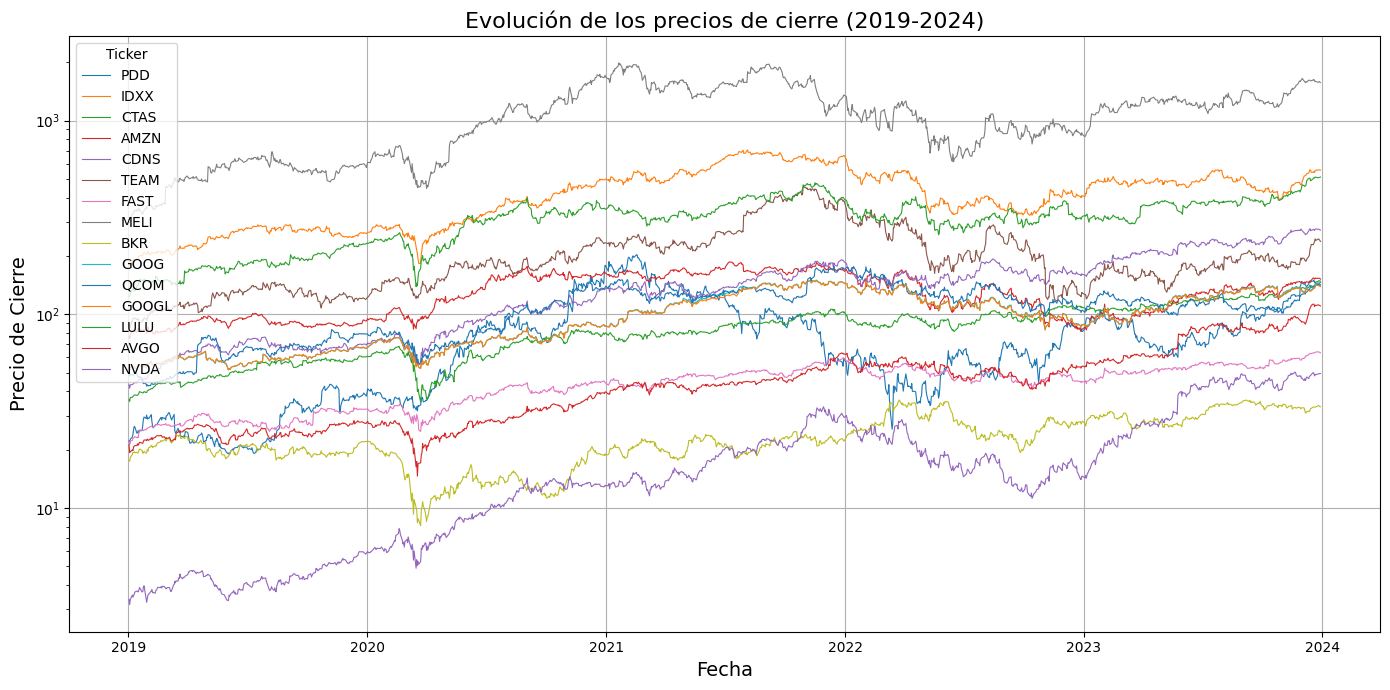

In [9]:

# Seleccionar los primeros 15 tickers para graficar
tickers_to_plot = asset_data.columns[:15]

# Graficar la evolución de los precios de cierre
plt.figure(figsize=(14, 7))
for ticker in tickers_to_plot:
    plt.plot(asset_data.index, asset_data[ticker], lw = 0.8, label=ticker.replace('_', ''))

# Personalizar el gráfico
plt.semilogy()
plt.title('Evolución de los precios de cierre (2019-2024)', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio de Cierre', fontsize=14)
plt.legend(title='Ticker', loc='upper left')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño para que no se solapen las etiquetas
plt.show()


##### Transformamos los precios Diarios en precios Mensuales:

In [10]:
# Busco precios mensuales:
# Muestreo los precios diarios quedandome con el del ultimo dia habil de cada mes ("BM": "Business Month")

monthly_prices = asset_data.asfreq(freq='BM').ffill()
monthly_prices.head()

C:\Users\Bruno\AppData\Local\Temp\ipykernel_12140\3536640296.py:4: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  monthly_prices = asset_data.asfreq(freq='BM').ffill()


,PDD,IDXX,CTAS,AMZN,CDNS,TEAM,FAST,MELI,BKR,GOOG,QCOM,GOOGL,LULU,AVGO,NVDA
Date,,,,,,,,,,,,,,,
2019-01-31 00:00:00+00:00,29.209999,212.779999,40.469437,85.936501,48.029999,98.400002,25.971609,364.000000,19.683443,55.618656,42.744499,56.091160,147.809998,22.485512,3.564825
2019-02-28 00:00:00+00:00,29.940001,211.029999,44.589539,81.991501,57.250000,107.480003,27.036942,458.790009,22.199631,55.795521,46.084991,56.124043,150.419998,23.081490,3.829403
2019-03-29 00:00:00+00:00,24.799999,223.600006,43.620491,89.037498,63.509998,112.389999,27.625441,507.730011,23.327284,58.455463,49.799355,58.631954,163.869995,25.431562,4.457458
2019-04-30 00:00:00+00:00,22.230000,232.000000,46.864349,96.325996,69.379997,110.150002,30.492987,484.140015,20.213615,59.211246,75.209846,59.731468,176.350006,26.927641,4.493205
2019-05-31 00:00:00+00:00,19.420000,249.770004,47.876575,88.753502,63.570000,125.879997,26.443108,570.520020,18.159891,54.983936,58.348103,55.125168,165.589996,21.281633,3.366543


# Optimización con Vector de Medias, Covarianza y Volatilidad
Con los datos históricos de distintas acciones, calculamos dos elementos claves: los rendimientos esperados anualizados y la matriz de covarianzas anualizada. Estos parámetros son fundamentales, ya que permiten modelar y simular múltiples portafolios con diferentes combinaciones de activos.

A partir de estas simulaciones, se construye la frontera eficiente, que representa el conjunto de portafolios óptimos. Estos portafolios destacan por maximizar el rendimiento esperado para un nivel de riesgo determinado o minimizar el riesgo para un rendimiento específico. La frontera eficiente es una herramienta esencial para los inversionistas, ya que resume gráficamente las mejores combinaciones posibles entre riesgo y retorno.

El método de optimización elegido definirá el portafolio final. Este portafolio, que estará siempre dentro de la frontera eficiente, se considerará óptimo en términos de la relación entre riesgo y rendimiento.

In [11]:
!pip install cvxpy
import cvxpy as cp
!pip install git+https://github.com/robertmartin8/PyPortfolioOpt.git
from pypfopt import expected_returns
from pypfopt import risk_models
!pip install seaborn
import seaborn as sns

  Cloning https://github.com/robertmartin8/PyPortfolioOpt.git to c:\users\bruno\appdata\local\temp\pip-req-build-2x5w6o5o
  Resolved https://github.com/robertmartin8/PyPortfolioOpt.git to commit 65cabcee11d91777d63628744c36869ec64a1c85
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/robertmartin8/PyPortfolioOpt.git 'C:\Users\Bruno\AppData\Local\Temp\pip-req-build-2x5w6o5o'


In [12]:
# Calculo el vector de medias y matriz de covarianzas anualizadas.
# Como pase datos menusales, frequency = 12; si hubiera pasado datos diarios, frequency = 252. Los resultados no tienen por que coincidir, ya que los datos diarios son mas ruidosos.
mean_returns_annualized = expected_returns.mean_historical_return(monthly_prices, returns_data=False, compounding=True, frequency=12, log_returns=False)
covariance_matrix_annualized = risk_models.sample_cov(monthly_prices, frequency=12, returns_data=False, log_returns=False)

### Vector de Medias

El Vector de Medias es un concepto utilizado en la teoría de portafolios para representar los rendimientos esperados de cada activo en un portafolio. Se trata de un vector columna en el que cada elemento corresponde a la media de la distribución de rendimientos de una variable (activo) en particular, calculada de manera independiente. Este vector es fundamental para la optimización del portafolio, ya que nos permite conocer el rendimiento esperado de cada activo que compone el portafolio y utilizarlo en el proceso de asignación de pesos.

In [13]:
# Visualizacion del vector de medias
mean_returns_annualized = pd.DataFrame(mean_returns_annualized.to_numpy().reshape(-1,1),
                                       index = mean_returns_annualized.index,
                                       columns = ['Mean Return Annualized'])
mean_returns_annualized

,Mean Return Annualized
PDD,0.387780
IDXX,0.215323
CTAS,0.302594
AMZN,0.122892
CDNS,0.423259
TEAM,0.196643
FAST,0.198814
MELI,0.346474
BKR,0.112993
GOOG,0.207281


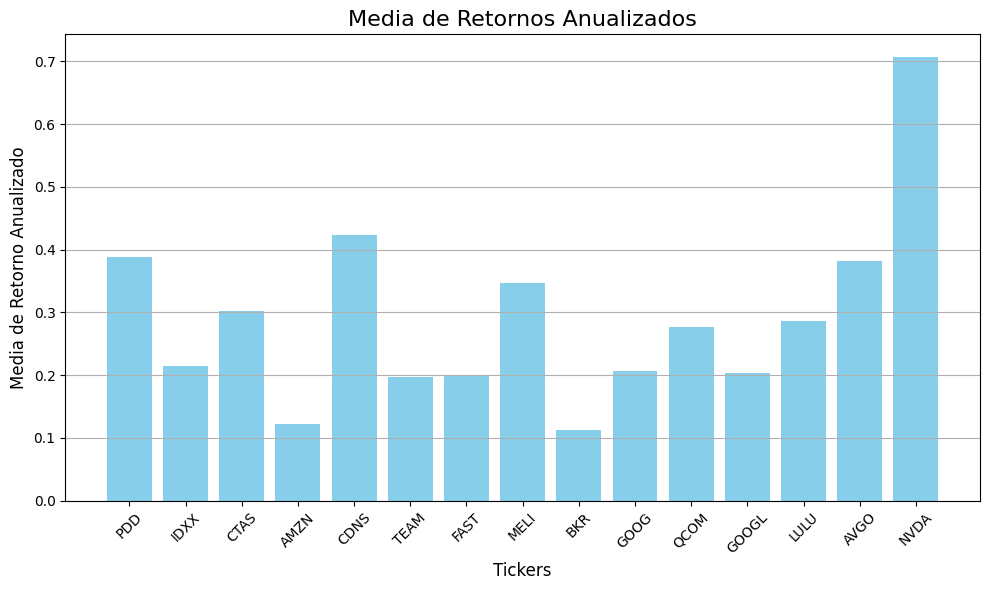

In [14]:
import matplotlib.pyplot as plt

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear un gráfico de barras para las medias anuales
plt.bar(mean_returns_annualized.index, mean_returns_annualized['Mean Return Annualized'], color='skyblue')

# Personalizar el gráfico
plt.title('Media de Retornos Anualizados', fontsize=16)
plt.xlabel('Tickers', fontsize=12)
plt.ylabel('Media de Retorno Anualizado', fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.grid(axis='y')  # Añadir líneas de cuadrícula en el eje y

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño
plt.show()


## Matriz de Covarianza

Es una herramienta clave en la teoría de portafolios que muestra cómo los activos se mueven en relación unos con otros. Es una matriz cuadrada donde cada elemento refleja la covarianza entre dos activos, es decir, cómo varían juntos los rendimientos de esos activos. En otras palabras, nos da una visión de la relación entre los riesgos de los diferentes activos dentro de un portafolio. Esta matriz es esencial para evaluar cómo se combinan los riesgos individuales de los activos y cómo afectan el riesgo total del portafolio, lo cual es fundamental para la toma de decisiones en la optimización de la cartera.

In [15]:
# Visualizacion de la matriz de covarianzas
covariance_matrix_annualized # Ya es un dataframe

,PDD,IDXX,CTAS,AMZN,CDNS,TEAM,FAST,MELI,BKR,GOOG,QCOM,GOOGL,LULU,AVGO,NVDA
PDD,0.489428,0.050771,0.029168,0.009042,0.027855,0.017279,0.029946,0.106288,0.074017,0.028704,0.047036,0.026906,0.035641,0.021397,0.011125
IDXX,0.050771,0.117771,0.056973,0.059766,0.057972,0.052884,0.044106,0.097509,0.050691,0.052823,0.061978,0.052835,0.063129,0.055279,0.089379
CTAS,0.029168,0.056973,0.089433,0.041815,0.049714,0.034690,0.051080,0.070725,0.071217,0.043352,0.051951,0.043468,0.069812,0.054460,0.065182
AMZN,0.009042,0.059766,0.041815,0.105738,0.063052,0.056328,0.041171,0.077973,0.018645,0.056891,0.073736,0.055763,0.045720,0.052421,0.101129
CDNS,0.027855,0.057972,0.049714,0.063052,0.087972,0.043253,0.041921,0.084554,0.038524,0.044960,0.058171,0.045565,0.049095,0.057416,0.086102
TEAM,0.017279,0.052884,0.034690,0.056328,0.043253,0.191299,0.018945,0.116869,0.018483,0.057892,0.012474,0.058452,0.042218,0.030353,0.053799
FAST,0.029946,0.044106,0.051080,0.041171,0.041921,0.018945,0.060205,0.045580,0.046641,0.033916,0.057148,0.033986,0.059492,0.048362,0.068158
MELI,0.106288,0.097509,0.070725,0.077973,0.084554,0.116869,0.045580,0.248826,0.079146,0.062966,0.057253,0.062324,0.086573,0.050672,0.084151
BKR,0.074017,0.050691,0.071217,0.018645,0.038524,0.018483,0.046641,0.079146,0.222416,0.044267,0.029135,0.044380,0.059841,0.062125,0.057649
GOOG,0.028704,0.052823,0.043352,0.056891,0.044960,0.057892,0.033916,0.062966,0.044267,0.073515,0.043493,0.072759,0.047962,0.045620,0.081025


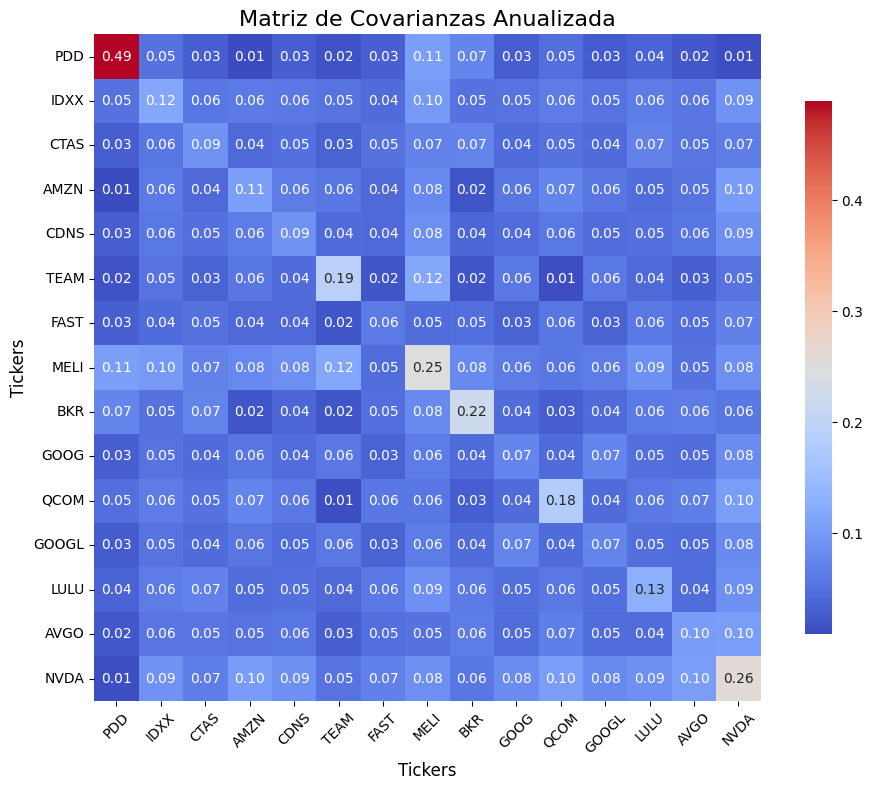

In [16]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix_annualized, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
# Personalizar el gráfico
plt.title('Matriz de Covarianzas Anualizada', fontsize=16)
plt.xlabel('Tickers', fontsize=12)
plt.ylabel('Tickers', fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.yticks(rotation=0)   # Mantener etiquetas del eje y horizontal

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño
plt.show()

## Volatilidad Individual
es una medida de la variabilidad de los precios de las acciones a lo largo del tiempo, es decir, el ritmo al que los precios suben o bajan en un periodo determinado. En este caso, vamos a analizar la volatilidad de cada empresa de manera individual, lo que nos permitirá entender el nivel de riesgo asociado a cada una de ellas en términos de fluctuaciones de su precio. Al visualizar la volatilidad de las distintas empresas, podemos identificar cuáles tienen un comportamiento más errático y cuáles son más estables en el mercado. 

## σX = V[X]^1/2                  

En el cálculo de las volatilidades individuales de los activos, es importante considerar que estas corresponden a la varianza de cada activo. Una forma eficiente de obtener estas volatilidades es extrayendo los valores directamente de la diagonal de la matriz de covarianzas, en lugar de calcularlas individualmente

In [17]:
volatility_annualized = np.sqrt(np.diag(covariance_matrix_annualized)).reshape(-1,1)
volatility_annualized = pd.DataFrame(volatility_annualized, index = covariance_matrix_annualized.columns, columns = ['Volatility Annualized'])
volatility_annualized

,Volatility Annualized
PDD,0.699591
IDXX,0.343178
CTAS,0.299054
AMZN,0.325174
CDNS,0.296601
TEAM,0.437377
FAST,0.245367
MELI,0.498824
BKR,0.471610
GOOG,0.271137


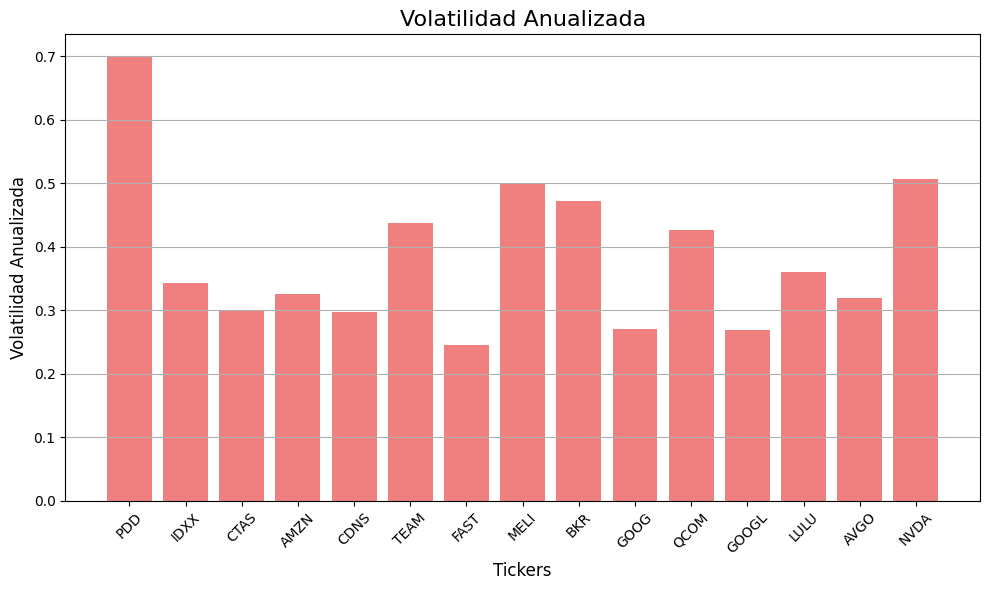

In [18]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear un gráfico de barras para la volatilidad anualizada
plt.bar(volatility_annualized.index, volatility_annualized['Volatility Annualized'], color='lightcoral')

# Personalizar el gráfico
plt.title('Volatilidad Anualizada', fontsize=16)
plt.xlabel('Tickers', fontsize=12)
plt.ylabel('Volatilidad Anualizada', fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.grid(axis='y')  # Añadir líneas de cuadrícula en el eje y

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño
plt.show()


## Representación de los Activos en el Espacio de Parámetros

Utilizaremos un diagrama de dispersión para representar a las empresas en un espacio de parámetros definido por las variables **riesgo y rendimiento**

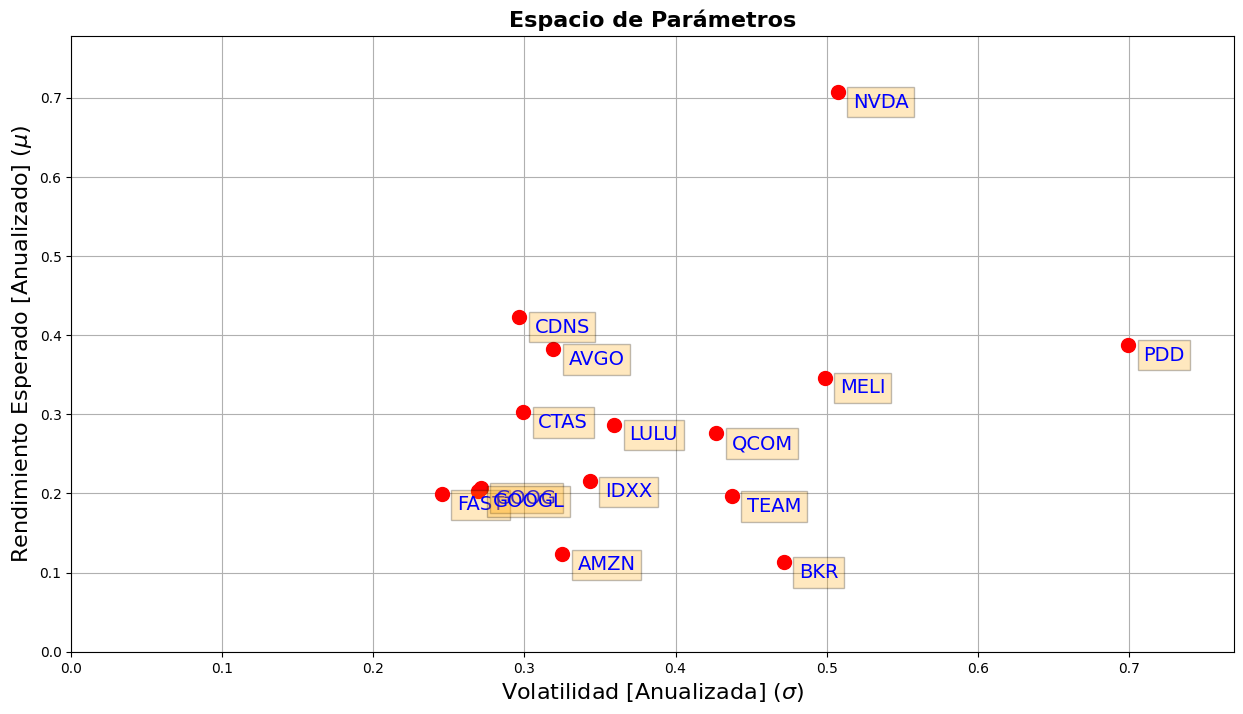

In [19]:
# Visualizacion de activos en el plano riesgo-rendimiento

fig, ax = plt.subplots(1,1, figsize = (15,8), dpi = 100)

for i in range(len(tickers)):
    ax.plot(volatility_annualized.values[i], mean_returns_annualized.values[i],
               markersize = 10, marker="o", markeredgecolor= 'red', markerfacecolor= 'red')

    ax.text(x =volatility_annualized.values[i] + 0.01, y = mean_returns_annualized.values[i] - 0.02, s = mean_returns_annualized.index[i],
             fontdict = dict(color = 'blue', alpha = 1, size = 14),
            bbox = dict(facecolor = 'orange', alpha = 0.25))



ax.set_xlim(0, 1.1 * np.max(volatility_annualized.values))
ax.set_ylim(0, 1.1 * np.max(mean_returns_annualized.values))


ax.set_ylabel('Rendimiento Esperado [Anualizado] ($\mu$)', fontsize = 16)
ax.set_xlabel('Volatilidad [Anualizada] ($\sigma$)', fontsize = 16)
ax.set_title('Espacio de Parámetros', weight = 'bold', fontsize = 16)
ax.grid()

## Generación de Portafolios Aleatorios en el Espacio de Parámetros
A través de simulaciones de portafolios aleatorios con distintas parametrizaciones, generaremos la frontera eficiente. A partir de este conjunto de portafolios óptimos, seleccionaremos uno para su implementación en el mercado.


Para empezar, una breve explicacion de las funciones que utilizamos para estos calculos.

**Función portfolio_metrics**:
Calcula el rendimiento y el riesgo de un portafolio dado:

Usa los pesos (w), el vector de rendimientos medios (E(R)) y la matriz de covarianzas (C).
Implementa las fórmulas teóricas para E(Rp​) y σp.

**Función random_portfolios**:
Genera múltiples portafolios aleatorios para explorar diferentes combinaciones de pesos y sus métricas asociadas:
Se generan vectores de pesos aleatorios que suman 1.
Para cada portafolio, se calculan el rendimiento esperado y la volatilidad utilizando **portfolio_metrics**.
Devuelve una matriz de métricas (rendimiento y riesgo) y una lista de combinaciones de pesos.
Estas herramientas son esenciales para implementar el análisis de frontera eficiente, que identifica los portafolios óptimos en términos de riesgo y rendimiento.

La teoría de la frontera eficiente, propuesta por Harry Markowitz, establece que existe un conjunto óptimo de portafolios que maximizan el rendimiento esperado para un nivel dado de riesgo o minimizan el riesgo para un nivel dado de rendimiento. En este contexto, las funciones definidas permiten calcular las métricas fundamentales de cualquier portafolio: el rendimiento esperado y la volatilidad (riesgo), a partir de los pesos de los activos, los rendimientos medios y la matriz de covarianzas. Generar portafolios aleatorios, como lo hace la función **random_portfolios**, facilita explorar distintas combinaciones posibles, y al graficar sus métricas, se puede identificar la frontera eficiente.

In [20]:
# Defino una funcion para obtener el riesgo y rendimiento de un portafolio:
# Calculamos volatilidad y retorno de un portafolio
def portfolio_metrics(weights, mean_returns, cov_matrix):
    ret = weights @ mean_returns.values
    std = np.sqrt(weights @ (cov_matrix.values @ weights))   # np.dot(np.dot(weights, cov_matrix.values),weights)
    return ret, std

# Defino una funcion para generar portafolios aleatorios, dado un vector de medias y una matriz de covarianzas
def random_portfolios(num_port, mean_returns, cov_matrix):
    metrics = np.zeros((2,num_port))
    weights_matrix = []

    for i in range(num_port):
        weights = np.random.random(len(mean_returns.values))
        weights /= np.sum(weights)
        weights_matrix.append(weights)

        port_mu, port_std = portfolio_metrics(weights, mean_returns, cov_matrix)
        metrics[0,i] = port_mu
        metrics[1,i] = port_std
    return metrics, weights_matrix


#### Simulo múltiples portafolios aleatorios y almacenaro sus métricas de desempeño y composición de manera independiente.

In [21]:
# Número de portafolios
np.random.seed(123)
num_sim_portfolios = int(1e5)

# Simulacion
metrics, weights_matrix = random_portfolios(num_port = num_sim_portfolios,
                                            mean_returns = mean_returns_annualized,
                                            cov_matrix = covariance_matrix_annualized)

C:\Users\Bruno\AppData\Local\Temp\ipykernel_12140\1242042416.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  metrics[0,i] = port_mu


## Portafolio Óptimo de Mínima Varianza Global (Posiciones Long Únicamente)

#### Optimización por Mínima Varianza

La optimización por mínima varianza busca construir un portafolio que minimice el riesgo total, medido como la varianza de los rendimientos, para un nivel de retorno dado. En este trabajo práctico, se ajustan las ponderaciones de los activos utilizando datos financieros y de mercado para reducir la volatilidad total del portafolio, considerando tanto las correlaciones entre los activos como su volatilidad individual.

El objetivo es encontrar un portafolio eficiente, con la menor varianza posible, priorizando la estabilidad y la reducción del riesgo sobre la maximización del rendimiento. Este enfoque es útil para aquellos inversores que buscan minimizar la incertidumbre en su inversión, asegurando un desempeño más predecible a largo plazo.

Para lograr esto utilizamos un código implementa un modelo de optimización para calcular el portafolio de mínima varianza global, usando Programación Convexa (CVXPY). Primero, define un vector de pesos (w) como variable de decisión. Luego, calcula el retorno del portafolio (ret) y el riesgo (risk), utilizando los pesos y los datos de medias y covarianzas de los activos. Se establecen dos restricciones: que la suma de los pesos sea 1 (portafolio totalmente invertido) y que todos los pesos sean no negativos (inversiones largas solamente). Se crea y resuelve el problema de optimización, minimizando el riesgo bajo las restricciones especificadas. Finalmente, se imprime el riesgo óptimo y la composición óptima del portafolio.

In [22]:
import cvxpy as cp

In [23]:
# Renombro las variables por comodidad:
mu = mean_returns_annualized.values
Sigma = covariance_matrix_annualized.values
n = len(mu)

In [24]:
# Calculo del portafolio de minima varianza global:

# Creo el vector de weights como variable de decision
w = cp.Variable(n)

# Creo el retorno del portafolio, pasando el vector de weights (variable de decision) y el vector de medias (dato)
ret = w @ mu   # mu.T x w  # mu.T x w    ==      w.T mu    (por ser escalar)

# Creo el riesgo del portafolio como una forma cuadratica, pasando el vector de weights (variable de decision) y la matriz de covarianzas (dato)
risk = cp.quad_form(w, Sigma)   # wT Sigma w

# Especifico las restricciones como una lista de condiciones booleanas
constraints = [cp.sum(w) == 1,  # Fully invested
               w >= 0]          # Long-Only

# Creo una instancia del porblema de optimizacion, pasando el objetivo, y las restricciones:
prob = cp.Problem(cp.Minimize(risk), constraints)

# Resuelvo el problema
opt_risk = prob.solve()

# Vista rapida de resultados (despues vamos a formalizarlo)
print(f"Riesgo óptimo (Volatilidad): {np.sqrt(opt_risk)}\n Composicion Óptima: \n")
w.value


Riesgo óptimo (Volatilidad): 0.2162162600596573
 Composicion Óptima: 



array([ 3.98197146e-02, -2.47900815e-07,  2.91041308e-07,  1.74987895e-03,
        9.22399980e-02,  9.17064009e-02,  5.04075012e-01,  1.35618498e-06,
        1.59261437e-02,  1.42854439e-02, -2.53027517e-06,  2.30220962e-01,
        1.01429435e-06,  9.97461812e-03,  1.94467580e-06])

In [25]:
# Convierto el modelo en una funcion que toma como parametros un vector de retornos esperados, unamatriz de covarianzas, y un rendimiento minimo admisible (ya no estoy en el caso de minima varianza global):

def optimize_portfolio(mean_returns_vec, covariance_matrix, base_portfolio_return, allow_short=False, weight_truncation_threshold = 1e-06):
    '''

    :param mean_returns_vec: pd.DataFrame with asset returns as a (n,1) pd.Series, with index equal to asset names.
    :param covariance_matrix: pd.DataFrame with asset covariances as an (n,n) with row indexes  and column names equal to asset names in the same order.
    :param base_portfolio_return: Minimum admissible portfolio return threshold. It is mu_p in the restriction: w.T x mu >= mu_p
    :param weight_truncation_threshold: Threshold below which weight is forced to zero. This is to avoid (10^-23 weigths). Currently set to 10^(-6) by default.
    :return: dictionary containing (i) optimal risk value, (ii) portfolio return, (iii) dataframe with optimal composition indexed by asset
    '''

    mu = mean_returns_vec.values
    Sigma = covariance_matrix.values
    n = len(mu)
    positions_allowed = ''

    w = cp.Variable(n)

    ret = w @ mu   #mu.T @ w  # mu.T w    ==      w.T mu    (por ser escalar)
    risk = cp.quad_form(w, Sigma)   # wT Sigma w


    # Si pido minima varianza global, entonces es el problema de antes
    if base_portfolio_return == 'min_global_variance':
        if allow_short:
            positions_allowed = 'Long-Short'
            constraints = [cp.sum(w) == 1]
        else:
            positions_allowed = 'Long Only'
            constraints = [cp.sum(w) == 1,
                           w>=0]  # has long only constraint

    # por elcontrario, si pido un rendimiento minimo admisible, lo agrego como restriccion
    else:
        if allow_short:
            positions_allowed = 'Long-Short'
            constraints = [ret >= base_portfolio_return,
                           cp.sum(w) == 1]
        else:
            positions_allowed = 'Long Only'
            constraints = [ret >= base_portfolio_return,
                           cp.sum(w) == 1,
                           w>=0] # has long only constraint

    prob = cp.Problem(cp.Minimize(risk), constraints)
    prob.solve()

    # Una vez que resuelvo el problema, guardo las variables relevantes en un diccionario por comodidad.
    return {"portfolio_risk": np.sqrt(risk.value),   # Volatility
            "portfolio_return":ret[0].value,
            "portfolio_min_required_return": np.where(base_portfolio_return=='min_global_variance','Global Minimum Variance',base_portfolio_return),
            "positions_allowed":positions_allowed,
            "weights": pd.DataFrame(w.value, index = mean_returns_vec.index, columns = ["Portfolio Composition"]).apply(lambda r: np.where(np.abs(r) <= weight_truncation_threshold,0,r))}

In [26]:
def present_solution(solution, portfolio_type = 'Markowitz'):
    if portfolio_type == 'Markowitz':
        print(f"Portfolio Return: \t{solution['portfolio_return']:.4f} \t Minimum Admissible Return: {solution['portfolio_min_required_return']}\nPortfolio Risk: \t{solution['portfolio_risk']:.4f}\nPositions Allowed: \t{solution['positions_allowed']}")
        display(solution["weights"])
    if portfolio_type == 'Sharpe':
        print(f"Portfolio Return: \t\t\t{solution['portfolio_return']:.4f}\nPortfolio Risk: \t\t\t{solution['portfolio_risk']:.4f}\nPortfolio Sharpe Ratio: \t{solution['portfolio_sharpe']:.4f}\nRisk Free Rate: \t\t\t{solution['risk_free_rate']:.4}\nPositions Allowed: \t\t\t{solution['positions_allowed']}")
        display(solution["weights"])

In [27]:
# Pruebo la funcion con el portafolio de minima varianza global
min_global_variance_solution_longonly = optimize_portfolio(mean_returns_annualized, covariance_matrix_annualized, base_portfolio_return = 'min_global_variance')

present_solution(solution = min_global_variance_solution_longonly, portfolio_type = 'Markowitz')

Portfolio Return: 	0.2281 	 Minimum Admissible Return: Global Minimum Variance
Portfolio Risk: 	0.2162
Positions Allowed: 	Long Only


,Portfolio Composition
PDD,0.039880
IDXX,0.000000
CTAS,0.000000
AMZN,0.002137
CDNS,0.091925
TEAM,0.091566
FAST,0.504020
MELI,0.000000
BKR,0.015949
GOOG,0.000000


# Comparar el Portfolio con el Benchmark Nasdaq100

Por ultimo lo que haremos sera analizar y comparar el rendimiento de un portafolio de inversión optimizado con el **índice Nasdaq-100**. 

Una breve explicaccion del codigo: Primero, obtiene los pesos del portafolio optimizado y calcula los rendimientos diarios y acumulados tanto de los activos individuales como del portafolio en su conjunto. Luego, convierte estos rendimientos en porcentajes y los grafica para visualizar el rendimiento acumulado en comparación con el Nasdaq-100. Además, calcula indicadores clave como el rendimiento y la volatilidad anualizados, el ratio de Sharpe y el drawdown máximo para ambos, proporcionando una evaluación completa del desempeño del portafolio en relación al índice

,PDD,IDXX,CTAS,AMZN,CDNS,TEAM,FAST,MELI,BKR,GOOG,QCOM,GOOGL,LULU,AVGO,NVDA
Date,,,,,,,,,,,,,,,
2023-12-22 00:00:00+00:00,5.505178,2.036501,3.056325,0.993594,5.380292,1.704706,1.914386,4.332304,0.892051,1.729263,1.840071,1.683089,3.134576,4.223704,13.450820
2023-12-26 00:00:00+00:00,5.538496,2.047298,3.105322,0.993464,5.360398,1.752443,1.919292,4.290561,0.928650,1.731176,1.879063,1.683657,3.104743,4.269843,13.583696
2023-12-27 00:00:00+00:00,5.503827,2.053327,3.131082,0.992554,5.352996,1.730091,1.914386,4.338344,0.912568,1.704786,1.884209,1.661850,3.124929,4.243212,13.624537
2023-12-28 00:00:00+00:00,5.544350,2.052833,3.096190,0.993074,5.320611,1.709424,1.892084,4.307204,0.896487,1.701726,1.886980,1.659195,3.128253,4.225706,13.655611
2023-12-29 00:00:00+00:00,5.587573,2.042036,3.106889,0.974362,5.300486,1.671684,1.888962,4.273447,0.895378,1.695033,1.862635,1.648955,3.145035,4.197026,13.655611


,Portfolio Returns
Date,
2023-12-22 00:00:00+00:00,2.684445
2023-12-26 00:00:00+00:00,2.694866
2023-12-27 00:00:00+00:00,2.679786
2023-12-28 00:00:00+00:00,2.660723
2023-12-29 00:00:00+00:00,2.650201


[*********************100%***********************]  1 of 1 completed


Date
2023-12-22    1.637595
2023-12-26    1.653483
2023-12-27    1.657938
2023-12-28    1.656629
2023-12-29    1.645225
Name: Adj Close, dtype: float64

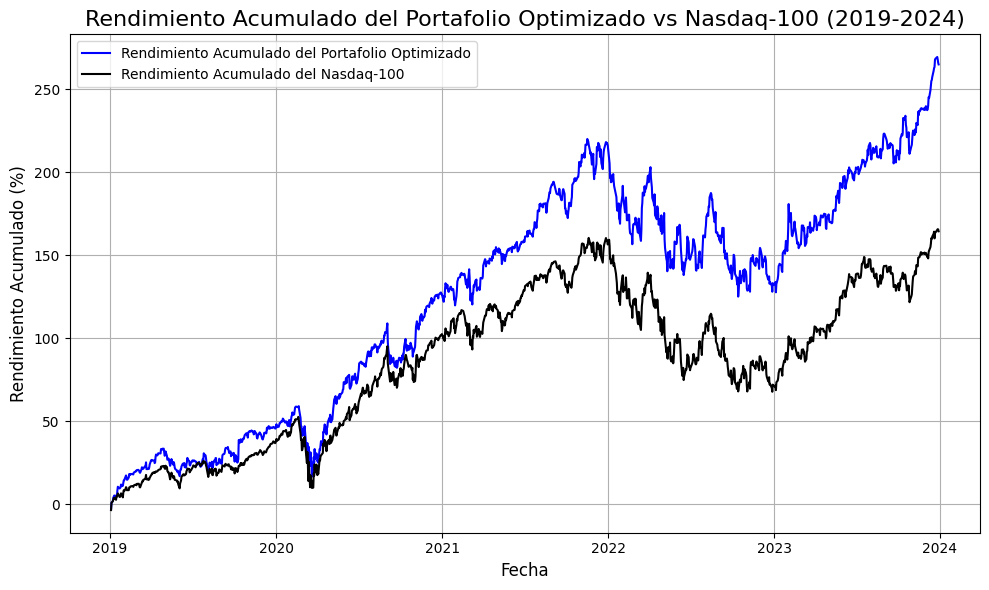

Portafolio Optimizado:
Rendimiento Acumulado: 265.02%
Rendimiento Anualizado: 34.05%
Volatilidad Anualizada: 25.93%
Ratio de Sharpe: 1.3132
Drawdown Máximo: -94.91%

Nasdaq:


AttributeError: 'numpy.float64' object has no attribute 'iloc'

In [31]:
# Obtener los pesos del portafolio optimizado
weights_optimized = min_global_variance_solution_longonly['weights']['Portfolio Composition']

# rendimiento diario de cada activo
asset_returns_daily = asset_data.pct_change().dropna()
asset_returns_cumulative = (1 + asset_returns_daily).cumprod() - 1
display(asset_returns_cumulative.tail())

# rendimiento diario del portafolio optimizado
portfolio_returns = (asset_returns_daily * weights_optimized).sum(axis=1)
portfolio_returns_cumulative = (1 + portfolio_returns).cumprod() - 1

# Mostrar las últimas filas del DataFrame
portfolio_returns_cumulative_df = portfolio_returns_cumulative.to_frame(name='Portfolio Returns')
display(portfolio_returns_cumulative_df.tail())

# Nasdaq100
nasdaq_data_raw = yf.download('^NDX', start=start_date, end=end_date)['Adj Close']
nasdaq_returns = nasdaq_data_raw.pct_change().dropna()
nasdaq_cumulative_returns = (1 + nasdaq_returns).cumprod() - 1
display(nasdaq_cumulative_returns.tail())

# Visualización
rendimiento_nasdaq = nasdaq_cumulative_returns * 100
rendimiento_portfolio = portfolio_returns_cumulative * 100

plt.figure(figsize=(10, 6))
plt.plot(rendimiento_portfolio, label="Rendimiento Acumulado del Portafolio Optimizado", color='blue')
plt.plot(rendimiento_nasdaq, label="Rendimiento Acumulado del Nasdaq-100", color='Black')
plt.title('Rendimiento Acumulado del Portafolio Optimizado vs Nasdaq-100 (2019-2024)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Rendimiento Acumulado (%)', fontsize=12)
plt.legend(loc='best')
plt.tight_layout()
plt.grid(True)
plt.show()

# Definir tasa libre de riesgo (por ejemplo, rendimiento de bonos del tesoro a 10 años)
risk_free_rate = 0.0425  # 4.25% como ejemplo, ajustar según el período

# Cálculo de métricas para el portafolio
portfolio_annualized_return = (1 + portfolio_returns.mean()) ** 252 - 1
portfolio_volatility = portfolio_returns.std() * np.sqrt(252)
portfolio_sharpe_ratio = (portfolio_annualized_return - risk_free_rate) / portfolio_volatility
portfolio_rolling_max = portfolio_returns_cumulative.cummax()
portfolio_drawdown = portfolio_returns_cumulative - portfolio_rolling_max
portfolio_max_drawdown = portfolio_drawdown.min()

# Cálculo de métricas para el Nasdaq
nasdaq_annualized_return = (1 + nasdaq_returns.mean()) ** 252 - 1
nasdaq_volatility = nasdaq_returns.std() * np.sqrt(252)
nasdaq_sharpe_ratio = (nasdaq_annualized_return - risk_free_rate) / nasdaq_volatility
nasdaq_rolling_max = nasdaq_cumulative_returns.cummax()
nasdaq_drawdown = nasdaq_cumulative_returns - nasdaq_rolling_max
nasdaq_max_drawdown = nasdaq_drawdown.min()

# Mostrar resultados
print("Portafolio Optimizado:")
print(f"Rendimiento Acumulado: {rendimiento_portfolio.iloc[-1]:.2f}%")
print(f"Rendimiento Anualizado: {portfolio_annualized_return * 100:.2f}%")
print(f"Volatilidad Anualizada: {portfolio_volatility * 100:.2f}%")
print(f"Ratio de Sharpe: {portfolio_sharpe_ratio:.4f}")
print(f"Drawdown Máximo: {portfolio_max_drawdown * 100:.2f}%")

print("\nNasdaq:")
print(f"Rendimiento Acumulado: {rendimiento_nasdaq.iloc[-1]:.2f}%")
print(f"Rendimiento Anualizado: {nasdaq_annualized_return * 100:.2f}%")
print(f"Volatilidad Anualizada: {nasdaq_volatility * 100:.2f}%")
print(f"Ratio de Sharpe: {nasdaq_sharpe_ratio:.4f}")
print(f"Drawdown Máximo: {nasdaq_max_drawdown * 100:.2f}%")